In [285]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [278]:
f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

# **************************************************************************************************************#

path = "/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

#

df = mpt.drop_a_column(df, "Unnamed: 0")

#

df = df.assign(condition=0)
df = mpt.change_the_values_by_applying_a_time_filter(df, f1_start, f1_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f2_start, f2_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f3_start, f3_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f4_start, f4_finish, "condition", 1)




# optional 1

df["data_point_number"] = df.index + 1

# optional 2

df  = mpt.counter_for_maintenance(df , "2020-02-01 00:00:00", f1_finish)
df  = mpt.counter_for_maintenance(df , f1_finish, f2_finish)
df  = mpt.counter_for_maintenance(df , f2_finish, f3_finish)
df  = mpt.counter_for_maintenance(df , f3_finish, f4_finish)
df = mpt.counter_for_maintenance(df, f4_finish, "2020-09-01 03:59:51")



#

all_column_names = df.columns.to_list()

name_of_the_categorical_columns = ['COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

name_of_the_numerical_columns =["counter",'data_point_number','TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current']

target_column = df["condition"]

#

df_scaled = mpt.scale_columns(df, name_of_the_numerical_columns)

# optional 3

df_clustered = mpt.apply_kmeans_clustering(df_scaled, 5, "condition")

In [286]:
datetime_column = df.columns[0]  # Adjust this if your datetime column isn't the first one

# Add month and week number columns
df_clustered['number_of_the_month'] = df_clustered[datetime_column].dt.month
df_clustered['number_of_the_week'] = df_clustered[datetime_column].dt.isocalendar().week
df_clustered["number_of_the_day"] = df_clustered[datetime_column].dt.isocalendar().day


df_clustered['number_of_the_month'] = df_clustered['number_of_the_month'].astype('float64')
df_clustered['number_of_the_week'] = df_clustered['number_of_the_week'].astype('float64')
df_clustered['number_of_the_day'] = df_clustered['number_of_the_day'].astype('float64')

In [293]:
def aggregate(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8):
    

    result1 = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")

    probabilities = result1[0]
    y_test = result1[1]

    #probabilities = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")[0]
    #y_test = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "no")[1]
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition(df_ed, aggregation_size)
    return result


def agg_new_deneme(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):

    result1 = mpt.get_the_probabilities_with_logistic_regressionn_new(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)

    probabilities = result1[0]
    y_test = result1[1]

    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result


def agg_random_forest(n, f, df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):


    result1 = mpt.get_the_probabilities_with_random_forest_new(n, f, df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)


    probabilities = result1[0]
    y_test =result1[1]
    
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result


def agg_single_tree(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):


    result1 = mpt.get_the_probabilities_with_single_tree(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)


    probabilities = result1[0]
    y_test =result1[1]
    
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result



def plot_probabilities_by_condition(df, threshold): # tekrar yazılacak

    indices = np.arange(df.shape[0])
    
    # Create figure
    plt.figure(figsize=(8, 5))
    
    # Plot points with condition=0 and proba <= threshold in blue
    mask_0_below = (df['condition'] == 0) & (df['proba'] <= threshold)
    plt.scatter(indices[mask_0_below], df.loc[mask_0_below, 'proba'], 
                color='blue', alpha=0.7, label='condition=0')
    
    # Plot points with condition=0 and proba > threshold in red
    mask_0_above = (df['condition'] == 0) & (df['proba'] > threshold)
    plt.scatter(indices[mask_0_above], df.loc[mask_0_above, 'proba'], 
                color='red', alpha=0.7, label=f'condition=0, proba>{threshold}')
    
    # Plot points with condition=1 in black
    mask_1 = df['condition'] == 1
    plt.scatter(indices[mask_1], df.loc[mask_1, 'proba'], 
                color='black', alpha=0.7, label='condition=1')

    
    # Add labels and title
    plt.title('Probablity of Failure')
    plt.xlabel('Index')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [288]:
df_back_up = df_clustered.copy()

In [223]:
df = df_back_up.copy()

df1 = df.copy() # best but suspicious

df2 = df.drop(labels = ["Cluster"], axis = 1)  # OK but not suspicious

df3 = df.drop(labels = ["counter"], axis = 1) # the worst, do not even look at it

df4 = df.drop(labels = ["Cluster", "counter"], axis = 1)

df5 = df.drop(labels = ["Caudal_impulses", "Oil_level"], axis = 1)

df6 = df.drop(labels = ["TP2", "TP3", "Caudal_impulses", "Oil_level"], axis = 1)

df7 = df.drop(labels = ["Cluster", "Oil_level", "Caudal_impulses", "Oil_level"], axis = 1)

df8 = df.copy()

In [250]:
df10 = df.copy()


df10 = df.drop(labels = ["data_point_number"], axis = 1)

                     Importance
Cluster                0.241474
Oil_temperature        0.205417
DV_pressure            0.194290
Motor_current          0.073131
counter                0.069605
TP2                    0.057080
H1                     0.041064
number_of_the_day      0.040571
TP3                    0.024013
Reservoirs             0.017238
DV_eletric             0.013488
COMP                   0.009507
MPG                    0.007771
number_of_the_week     0.003679
number_of_the_month    0.000864
Caudal_impulses        0.000525
LPS                    0.000199
Pressure_switch        0.000062
Towers                 0.000013
Oil_level              0.000009
R-squareddd: 0.9999656713984751
F-Value Like: 354201221.025612


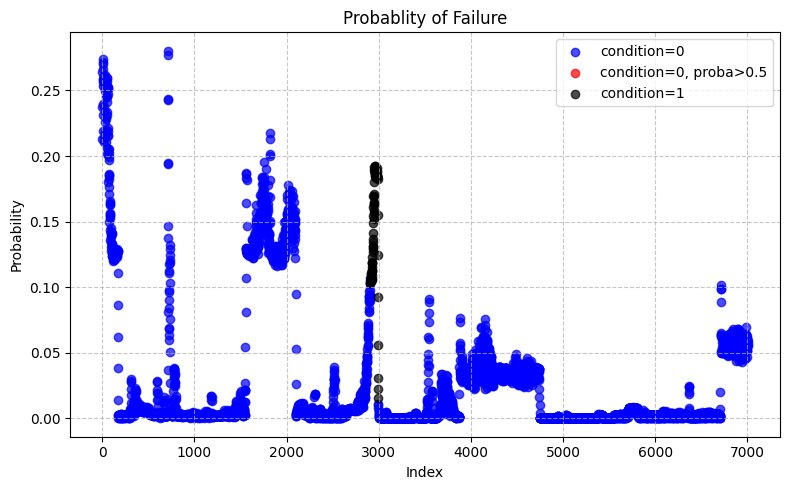

In [253]:
aggregation_size = 100

treshold_probability = 0.5

dataframe = df10

aggregated_probabilities = agg_random_forest(dataframe, aggregation_size, 5, 5, 5, 5, 5, 5, 10, 10, "yes", "yes", "yes", "no", 20)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

                     Coefficient       p_value
LPS                    -4.157415  0.000000e+00
data_point_number       4.115128  0.000000e+00
Oil_temperature         1.945521  0.000000e+00
H1                     -1.806963  0.000000e+00
number_of_the_month     1.437851  0.000000e+00
Motor_current          -1.330008  0.000000e+00
number_of_the_day       1.167842  0.000000e+00
TP2                    -0.892644  0.000000e+00
Oil_level              -0.883602  9.999959e-01
Caudal_impulses        -0.883602  9.999959e-01
COMP                   -0.811788  0.000000e+00
number_of_the_week     -0.806143  0.000000e+00
DV_pressure             0.797962  0.000000e+00
MPG                    -0.779143  3.250644e-11
TP3                    -0.603873  1.088019e-14
Pressure_switch         0.558997  0.000000e+00
Reservoirs             -0.408456  1.696048e-07
DV_eletric             -0.137233  2.008794e-02
Towers                 -0.034929  0.000000e+00
Intercept: -1.8158344324821878
R-squareddd: 0.95353202317096

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


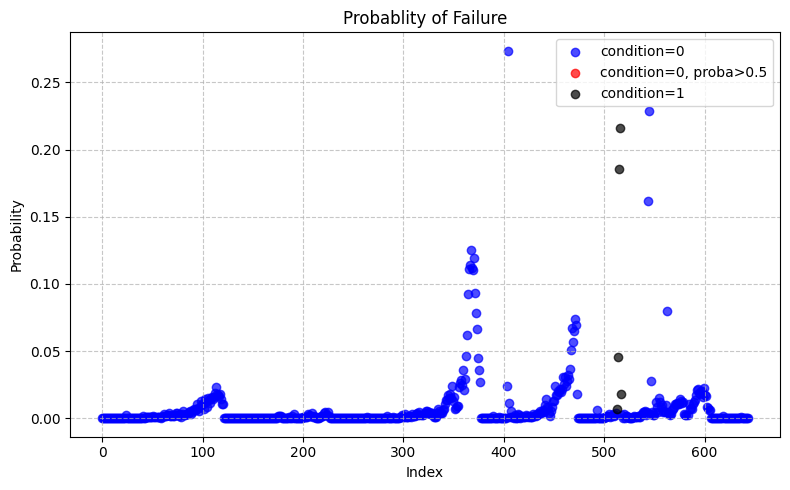

In [195]:
aggregation_size = 400

treshold_probability = 0.5

dataframe = df4

aggregated_probabilities = aggregate(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 30, 6)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

18
(19, 19)
                          TP2       TP3        H1  DV_pressure  Reservoirs  \
TP2                  1.000000 -0.152799 -0.967447     0.698614   -0.153545   
TP3                 -0.152799  1.000000  0.342664    -0.340269    0.999996   
H1                  -0.967447  0.342664  1.000000    -0.721320    0.343348   
DV_pressure          0.698614 -0.340269 -0.721320     1.000000   -0.340152   
Reservoirs          -0.153545  0.999996  0.343348    -0.340152    1.000000   
Oil_temperature      0.482021  0.151880 -0.428816     0.627366    0.152202   
Motor_current        0.759507  0.251365 -0.678048     0.545453    0.250711   
COMP                -0.927754  0.260034  0.947092    -0.692946    0.260719   
DV_eletric           0.945958 -0.203340 -0.954687     0.706396   -0.204014   
Towers              -0.571777  0.183191  0.591128    -0.424103    0.183620   
MPG                 -0.901367  0.224589  0.915188    -0.673033    0.225246   
LPS                  0.048592 -0.306415 -0.121097   

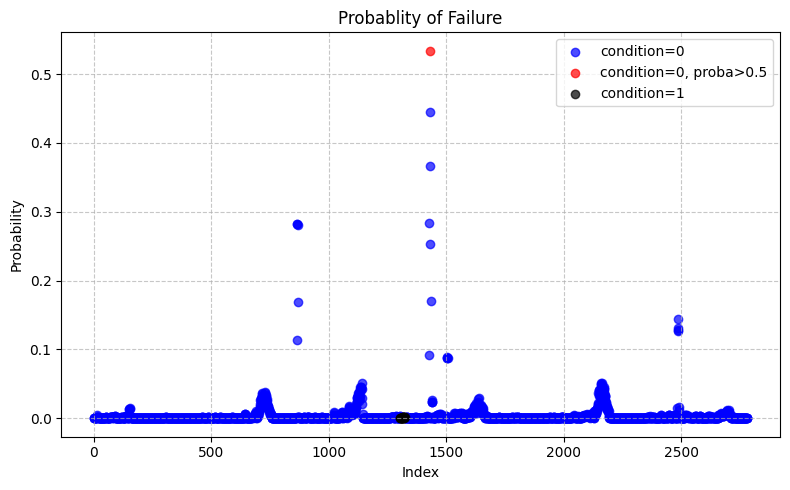

In [203]:
aggregation_size = 400

treshold_probability = 0.5

dataframe = df4

aggregated_probabilities = agg_new_deneme(dataframe, aggregation_size, 10, 10, 10, 10, 10, 10, 20, 20, "yes", "yes", "yes", "no", 100)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

                     Importance
Cluster            2.849140e-01
Oil_temperature    1.886222e-01
DV_pressure        1.595660e-01
H1                 8.644009e-02
Motor_current      7.464535e-02
TP2                7.272496e-02
counter            6.273741e-02
TP3                2.067313e-02
data_point_number  1.134667e-02
Reservoirs         1.102505e-02
COMP               1.050535e-02
DV_eletric         1.037129e-02
MPG                4.886715e-03
Oil_level          9.715490e-04
LPS                5.294733e-04
Towers             2.300052e-05
Pressure_switch    1.766911e-05
Caudal_impulses    7.213256e-08
R-squareddd: 0.9999551325868173
F-Value Like: 195229447.853473


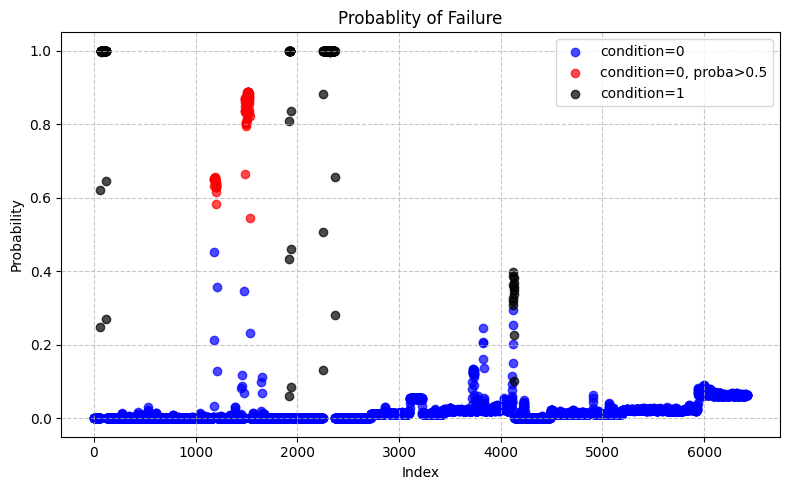

In [8]:
aggregation_size = 400

treshold_probability = 0.5

dataframe = df1

aggregated_probabilities = agg_random_forest(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 90, 90, "yes", "yes", "yes", "no", 150)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:418: RuntimeWarning: invalid value encountered in sqrt
  se_coef = np.sqrt(var_coef)
/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:421: RuntimeWarning: divide by zero encountered in divide
  z_scores = model.coef_[0] / se_coef


                   Coefficient   p_value
data_point_number     9.560774  0.000000
LPS                  -4.467330  0.000000
counter               3.757673  0.000000
Oil_temperature       2.941073       NaN
H1                   -2.688515       NaN
Pressure_switch       1.514443  0.000000
Motor_current        -1.223116       NaN
TP3                  -0.953987  0.366080
TP2                  -0.929603       NaN
DV_pressure           0.927808  0.000000
Reservoirs           -0.694717  0.000233
COMP                 -0.613000       NaN
DV_eletric           -0.494726  0.000000
Oil_level            -0.460892       NaN
Caudal_impulses      -0.460892       NaN
MPG                  -0.289837  0.361429
Towers               -0.012733  0.000000
Intercept: -11.399844332680116
R-squareddd: 0.9651920432826979
F-Value: 257191.9576366486


/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:418: RuntimeWarning: invalid value encountered in sqrt
  se_coef = np.sqrt(var_coef)
/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:421: RuntimeWarning: divide by zero encountered in divide
  z_scores = model.coef_[0] / se_coef


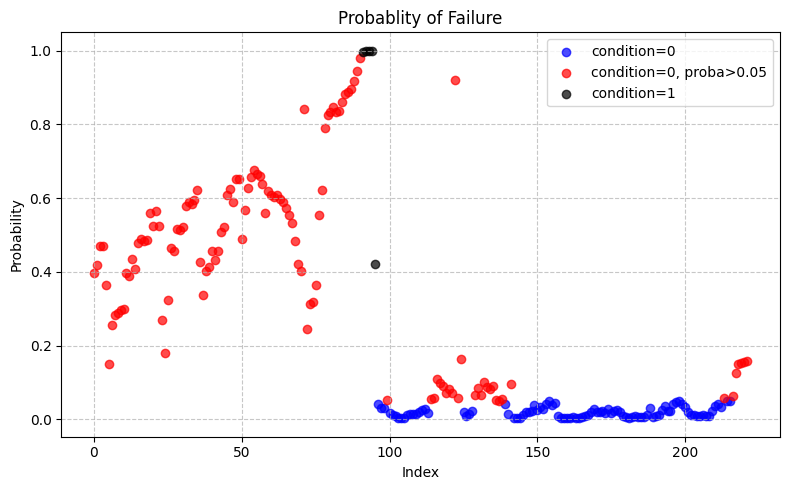

In [9]:
aggregation_size = 400

treshold_probability = 0.05

dataframe = df4

aggregated_probabilities = aggregate(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 6, 6)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:418: RuntimeWarning: invalid value encountered in sqrt
  se_coef = np.sqrt(var_coef)
/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:421: RuntimeWarning: divide by zero encountered in divide
  z_scores = model.coef_[0] / se_coef


                   Coefficient   p_value
data_point_number     9.560774  0.000000
LPS                  -4.467330  0.000000
counter               3.757673  0.000000
Oil_temperature       2.941073       NaN
H1                   -2.688515       NaN
Pressure_switch       1.514443  0.000000
Motor_current        -1.223116       NaN
TP3                  -0.953987  0.366080
TP2                  -0.929603       NaN
DV_pressure           0.927808  0.000000
Reservoirs           -0.694717  0.000233
COMP                 -0.613000       NaN
DV_eletric           -0.494726  0.000000
Oil_level            -0.460892       NaN
Caudal_impulses      -0.460892       NaN
MPG                  -0.289837  0.361429
Towers               -0.012733  0.000000
Intercept: -11.399844332680116
R-squareddd: 0.9651920432826979
F-Value: 257191.9576366486


/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:418: RuntimeWarning: invalid value encountered in sqrt
  se_coef = np.sqrt(var_coef)
/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:421: RuntimeWarning: divide by zero encountered in divide
  z_scores = model.coef_[0] / se_coef


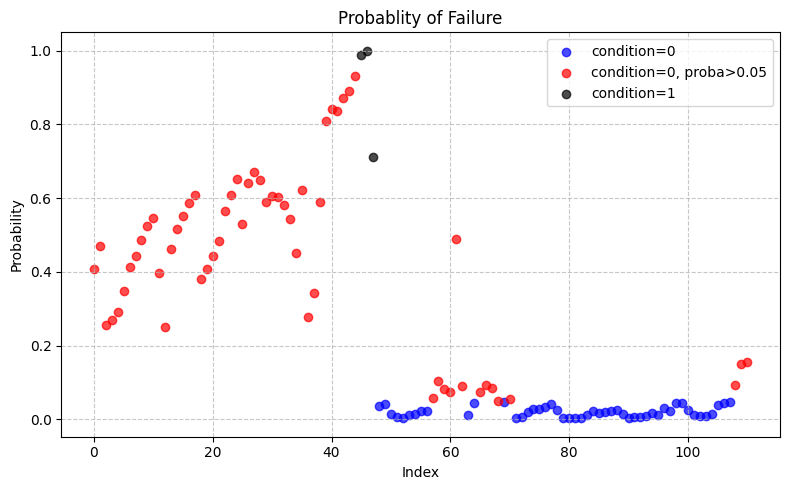

In [10]:
aggregation_size = 800

treshold_probability = 0.05

dataframe = df4

aggregated_probabilities = aggregate(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 6, 6)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

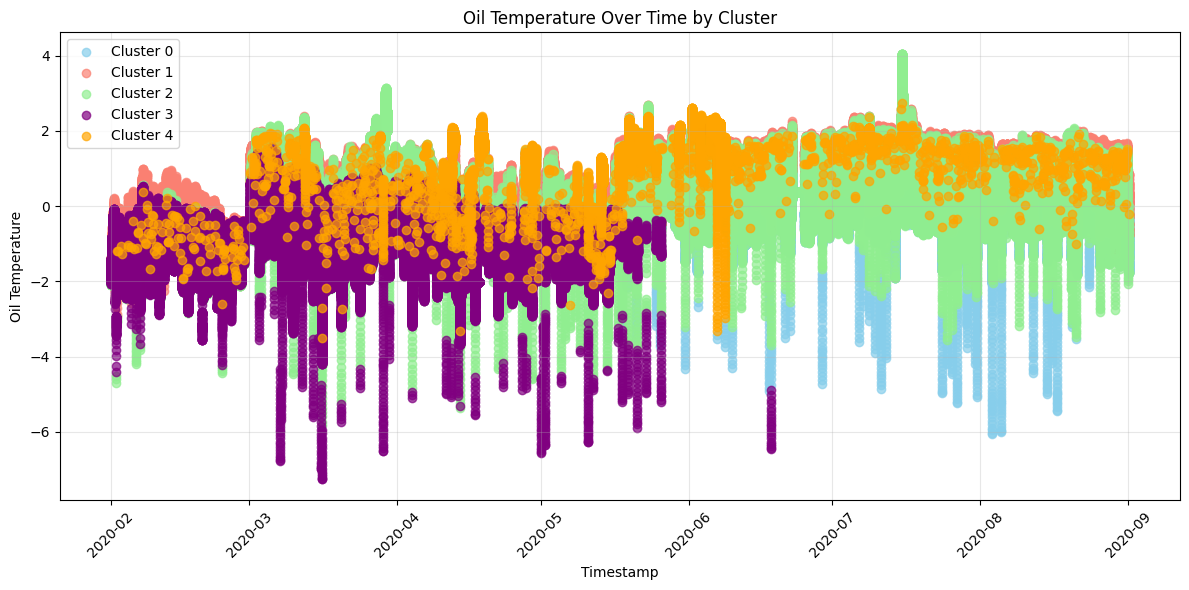

In [11]:
# Reset index if needed
df_plot = df_clustered.reset_index()

# Assuming df_clustered has:
# - A timestamp column (adjust name if different)
# - 'Oil_temperature' column
# - 'Cluster' column with cluster assignments

plt.figure(figsize=(12, 6))

# Define 5 distinct colors for the clusters
cluster_colors = ['skyblue', 'salmon', 'lightgreen', 'purple', 'orange']

# Create scatter plot with timestamps on x-axis, oil temp on y-axis
# and points colored by cluster
for i, cluster_id in enumerate(sorted(df_plot['Cluster'].unique())):
    cluster_data = df_plot[df_plot['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['timestamp'],  # x-axis: timestamps
        cluster_data['Oil_temperature'],  # y-axis: oil temperature
        label=f'Cluster {cluster_id}',
        alpha=0.7,
        # Use the color from our list based on the index
        color=cluster_colors[i % len(cluster_colors)]  # The modulo ensures we don't go out of bounds
    )

plt.xlabel('Timestamp')
plt.ylabel('Oil Temperature')
plt.title('Oil Temperature Over Time by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)  # Rotate timestamp labels for better readability
plt.tight_layout()
plt.show()

16
(17, 17)
                        TP2       TP3        H1  DV_pressure  Reservoirs  \
TP2                1.000000 -0.194198 -0.970648     0.776794   -0.194711   
TP3               -0.194198  1.000000  0.372561    -0.341012    0.999996   
H1                -0.970648  0.372561  1.000000    -0.790301    0.373028   
DV_pressure        0.776794 -0.341012 -0.790301     1.000000   -0.340791   
Reservoirs        -0.194711  0.999996  0.373028    -0.340791    1.000000   
Oil_temperature    0.559629  0.086988 -0.514051     0.675438    0.087365   
Motor_current      0.786010  0.197473 -0.710438     0.622449    0.196949   
COMP              -0.910279  0.288366  0.927487    -0.742165    0.288830   
DV_eletric         0.910199 -0.181235 -0.908992     0.741799   -0.181672   
Towers            -0.535621  0.194252  0.553862    -0.433884    0.194532   
MPG               -0.850487  0.198631  0.854429    -0.692997    0.199046   
LPS                0.047244 -0.344290 -0.124139     0.040652   -0.344949   


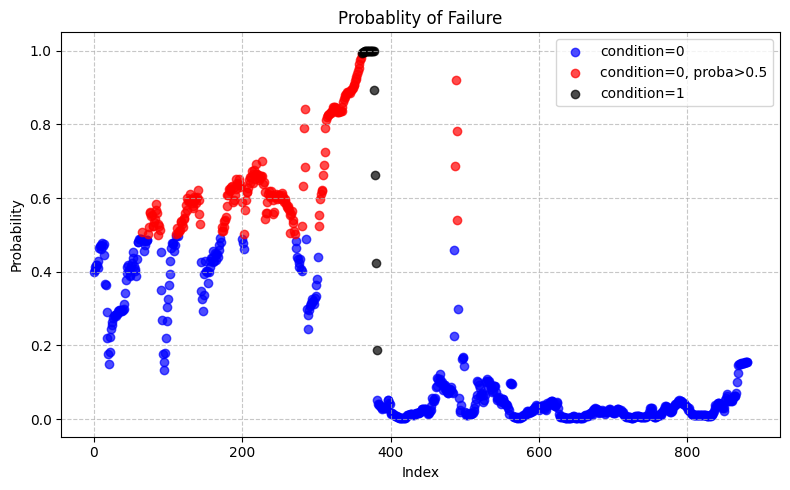

In [28]:
aggregation_size = 400

treshold_probability = 0.5

dataframe = df4

aggregated_probabilities = agg_new_deneme(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 6, 6, "yes", "yes", "yes", "no", 100)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

                     Importance
Cluster            2.849140e-01
Oil_temperature    1.886222e-01
DV_pressure        1.595660e-01
H1                 8.644009e-02
Motor_current      7.464535e-02
TP2                7.272496e-02
counter            6.273741e-02
TP3                2.067313e-02
data_point_number  1.134667e-02
Reservoirs         1.102505e-02
COMP               1.050535e-02
DV_eletric         1.037129e-02
MPG                4.886715e-03
Oil_level          9.715490e-04
LPS                5.294733e-04
Towers             2.300052e-05
Pressure_switch    1.766911e-05
Caudal_impulses    7.213256e-08
R-squareddd: 0.9999551325868173
F-Value Like: 195229447.853473


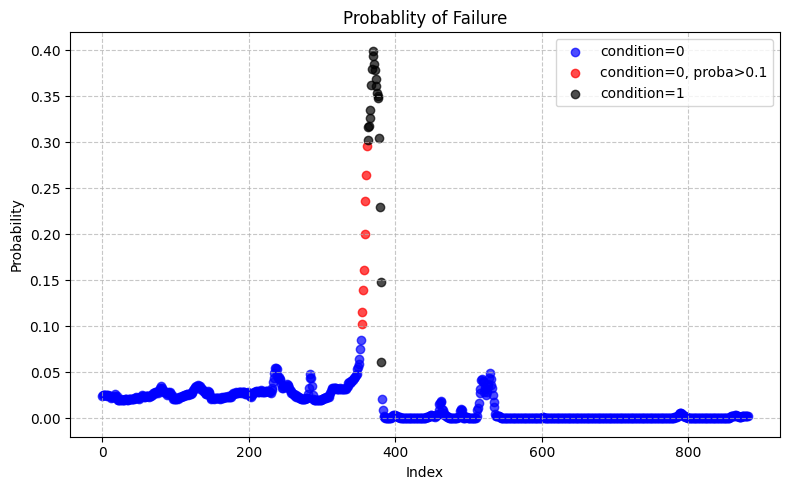

In [13]:
aggregation_size = 400

treshold_probability = 0.1

dataframe = df1

aggregated_probabilities = agg_random_forest(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 6, 6, "yes", "yes", "yes", "no", 100)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

                     Importance
Cluster            2.849140e-01
Oil_temperature    1.886222e-01
DV_pressure        1.595660e-01
H1                 8.644009e-02
Motor_current      7.464535e-02
TP2                7.272496e-02
counter            6.273741e-02
TP3                2.067313e-02
data_point_number  1.134667e-02
Reservoirs         1.102505e-02
COMP               1.050535e-02
DV_eletric         1.037129e-02
MPG                4.886715e-03
Oil_level          9.715490e-04
LPS                5.294733e-04
Towers             2.300052e-05
Pressure_switch    1.766911e-05
Caudal_impulses    7.213256e-08
R-squareddd: 0.9999551325868173
F-Value Like: 195229447.853473


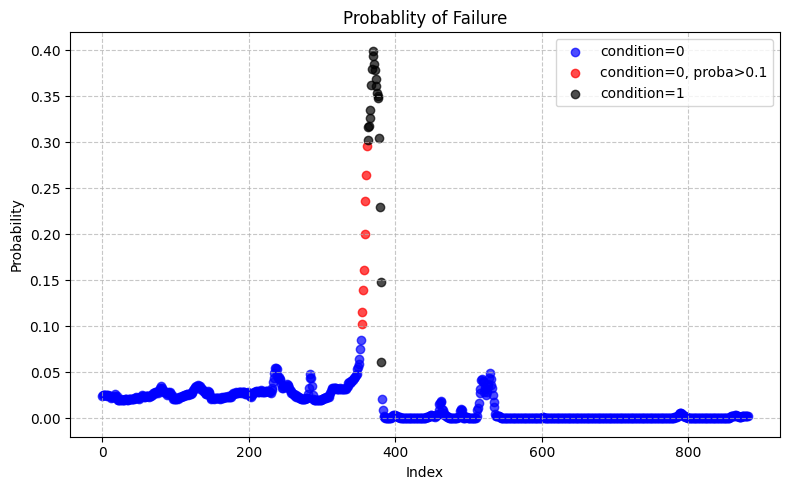

In [14]:
aggregation_size = 400

treshold_probability = 0.1

dataframe = df1

aggregated_probabilities = agg_random_forest(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 6, 6, "yes", "yes", "yes", "no", 100)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

ADDING MONTHS AND WEEKS

In [27]:
df8['number_of_the_month'] = df8["timestamp"].index.month
df8['number_of_the_week'] = df8["timestamp"].index.isocalendar().week

AttributeError: 'RangeIndex' object has no attribute 'month'

                     Importance
Cluster                0.246158
DV_pressure            0.197104
Oil_temperature        0.196875
Motor_current          0.084636
TP2                    0.065569
counter                0.063912
H1                     0.039267
number_of_the_day      0.031981
TP3                    0.018403
DV_eletric             0.015469
Reservoirs             0.013236
COMP                   0.010948
MPG                    0.009335
number_of_the_week     0.005081
number_of_the_month    0.000916
Caudal_impulses        0.000810
LPS                    0.000245
Pressure_switch        0.000026
Towers                 0.000023
Oil_level              0.000007
R-squareddd: 0.9999645165365825
F-Value Like: 222173077.20183903


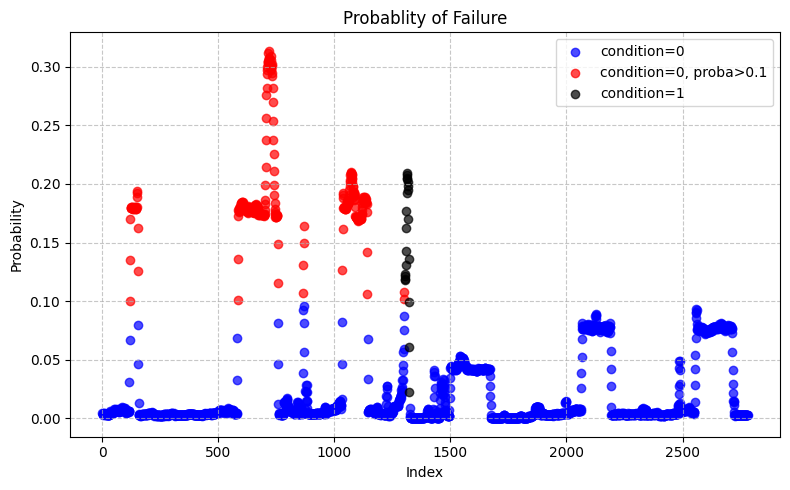

In [ ]:
df9 = df1.copy()

df9 = df.drop(labels = ["data_point_number"], axis = 1)

df9 = df9[df9['column_name'] != a]


aggregation_size = 500

treshold_probability = 0.1

dataframe = df9

aggregated_probabilities = agg_random_forest(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 20, 20, "yes", "yes", "yes", "no", 100)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:861: RuntimeWarning: divide by zero encountered in scalar divide
  f_value_like = (mse_baseline - mse_model) / mse_model * (len(y_train) - X_train.shape[1] - 1) / X_train.shape[1]


                     Importance
DV_pressure            0.890778
number_of_the_day      0.076175
Oil_temperature        0.026787
data_point_number      0.004154
number_of_the_week     0.000610
TP2                    0.000514
TP3                    0.000500
H1                     0.000483
Motor_current          0.000000
COMP                   0.000000
DV_eletric             0.000000
MPG                    0.000000
LPS                    0.000000
Pressure_switch        0.000000
Oil_level              0.000000
Caudal_impulses        0.000000
Reservoirs             0.000000
number_of_the_month    0.000000
Towers                 0.000000
R-squared: 1.0
F-Value Like: inf


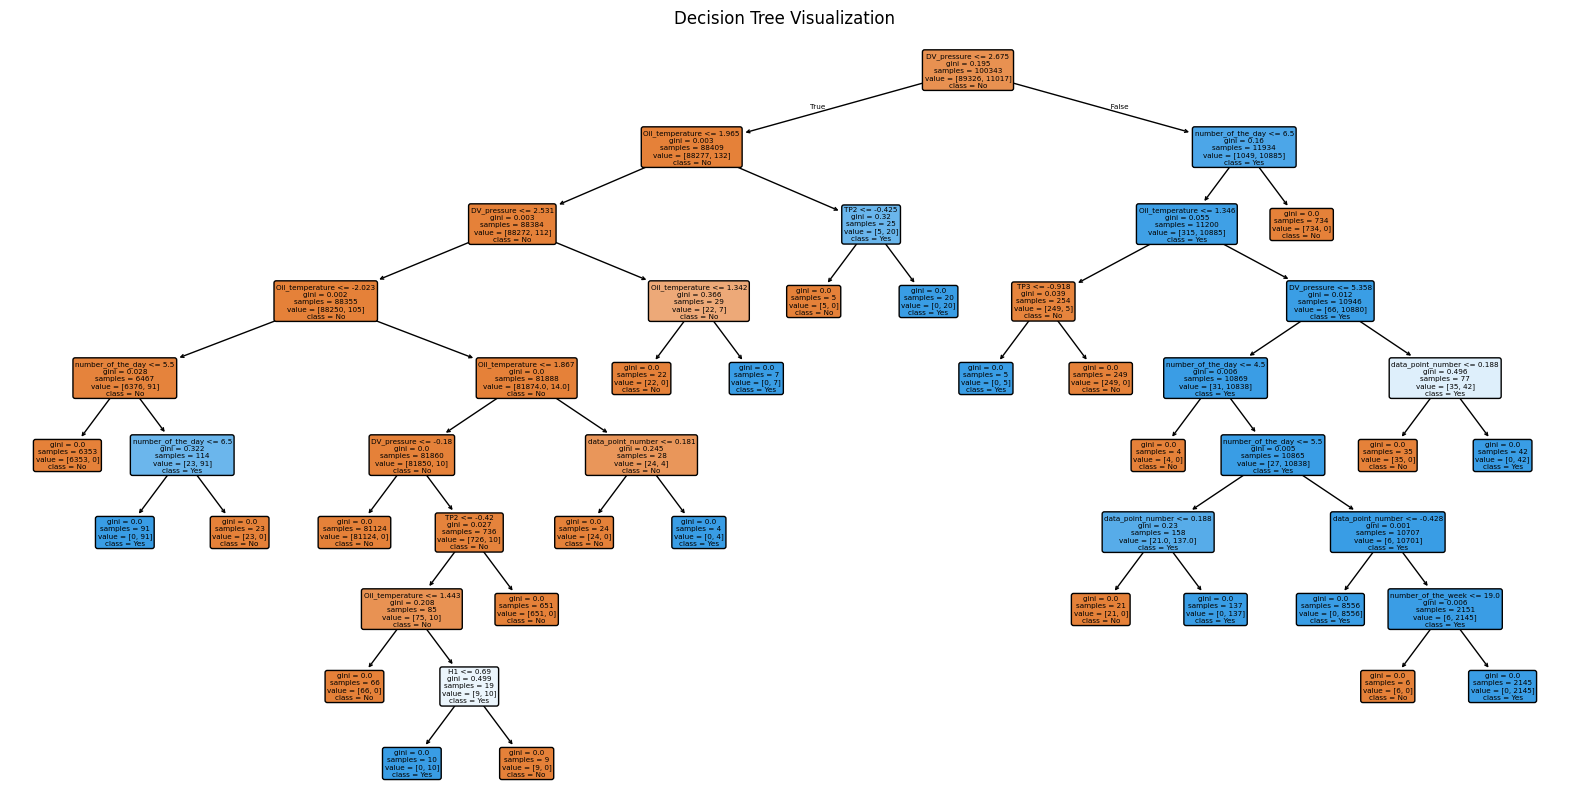

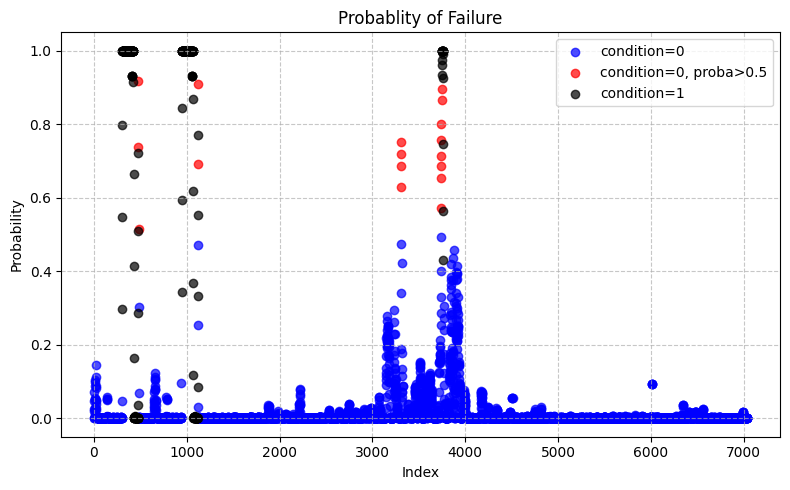

In [294]:
df9 = df1.copy()

df9 = df1.drop(labels = ["counter", "Cluster"], axis = 1)

aggregation_size = 400

treshold_probability = 0.5

dataframe = df9

aggregated_probabilities = agg_single_tree(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 45, 45, "yes", "yes", "no", "no", 100)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

/Users/abdullahfurkanarslan/Desktop/Graduation-Project-1/mpt_functions.py:692: RuntimeWarning: divide by zero encountered in scalar divide
  f_value_like = (mse_baseline - mse_model) / mse_model * (len(y_train) - X_train.shape[1] - 1) / X_train.shape[1]


                     Importance
DV_pressure            0.891051
number_of_the_day      0.074491
Oil_temperature        0.030194
Reservoirs             0.000918
TP3                    0.000860
H1                     0.000832
TP2                    0.000683
Motor_current          0.000411
number_of_the_week     0.000374
number_of_the_month    0.000187
LPS                    0.000000
R-squareddd: 1.0
F-Value Like: inf


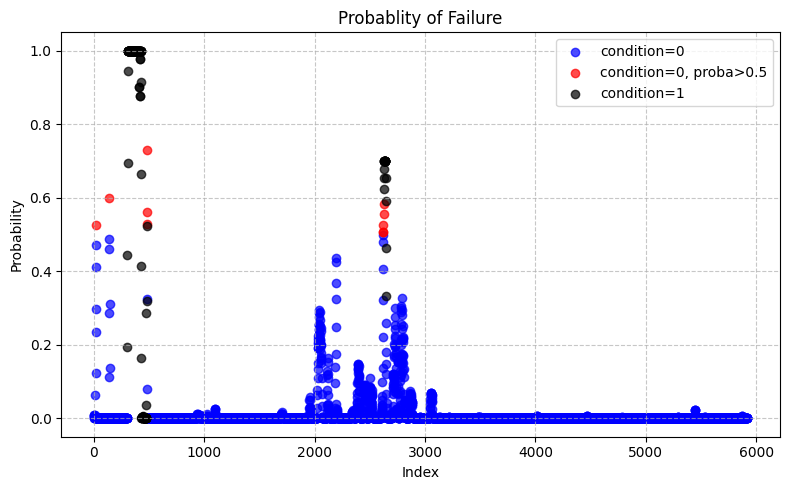

In [312]:
df9 = df1.copy()

df9 = df9.drop(labels = ["counter", "Cluster", 'Oil_level', 'DV_eletric', 'COMP', 'MPG', 'Towers', 'Pressure_switch', 'Caudal_impulses', "data_point_number"], axis = 1)

aggregation_size = 400

treshold_probability = 0.5

dataframe = df9

aggregated_probabilities = agg_random_forest(10, 12, dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 30, 45, "yes", "yes", "no", "no", 100)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)